**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

**Sample Dataset :-** https://www.kaggle.com/c/titanic/data

**1. Load the Data**

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(titanic_url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. Data Cleaning**

In [ ]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Create a new feature for Cabin
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop the Cabin column
df.drop('Cabin', axis=1, inplace=True)


Convert Categorical Variables to Numerical

In [ ]:
# Convert 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
# Drop non-numerical columns
df_numeric = df.drop(['Name', 'Ticket'], axis=1)

**3. Exploratory Data Analysis (EDA)**

Statistical Summary

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392,0.228956
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


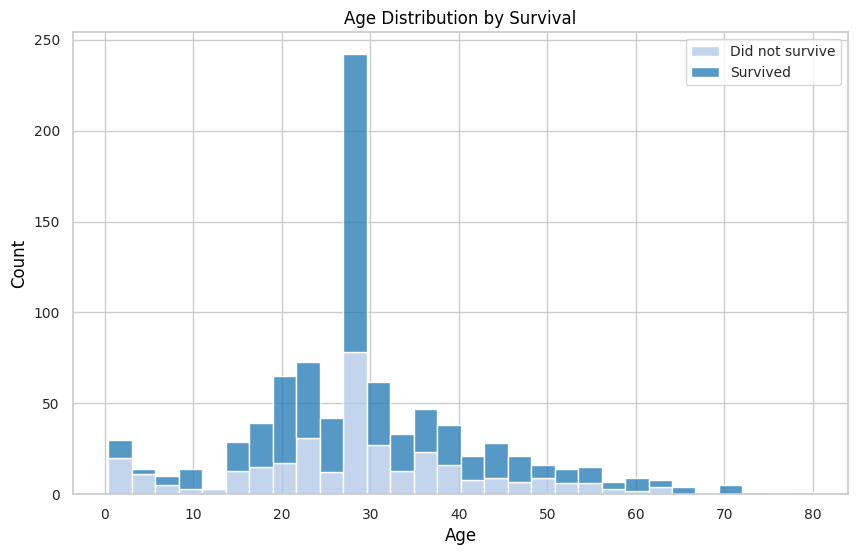

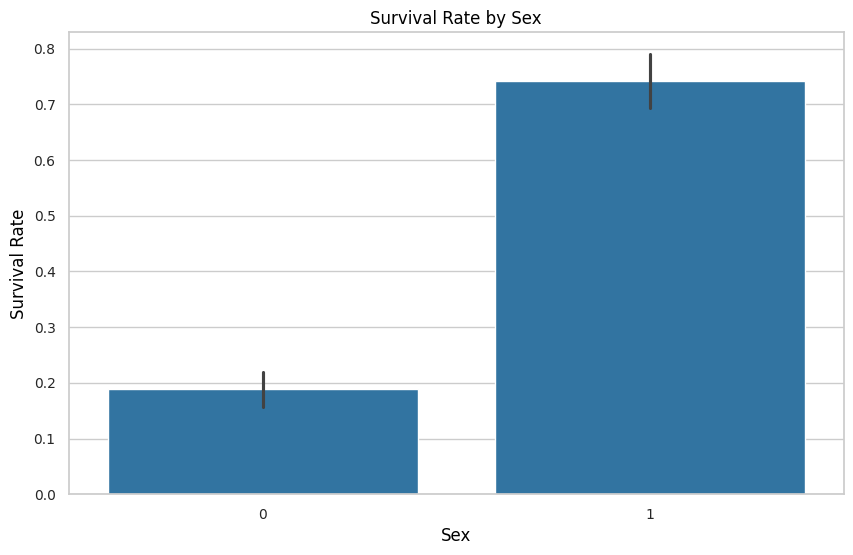

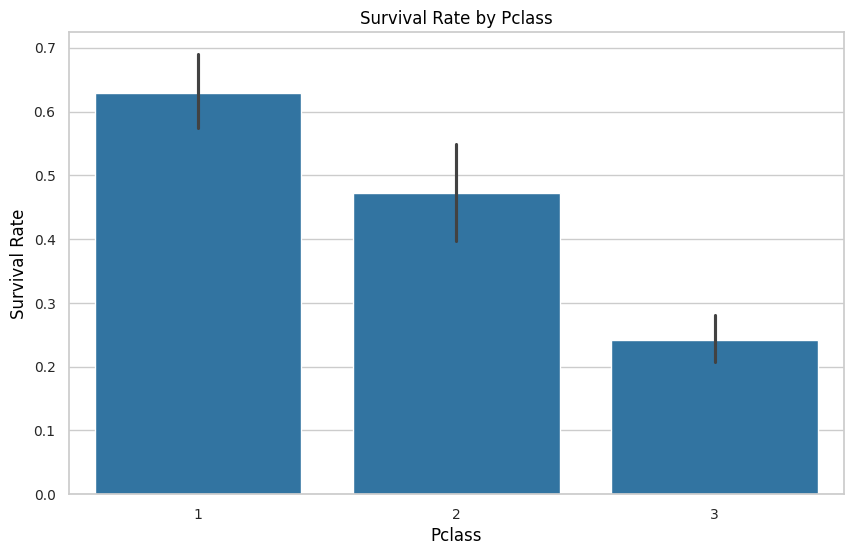

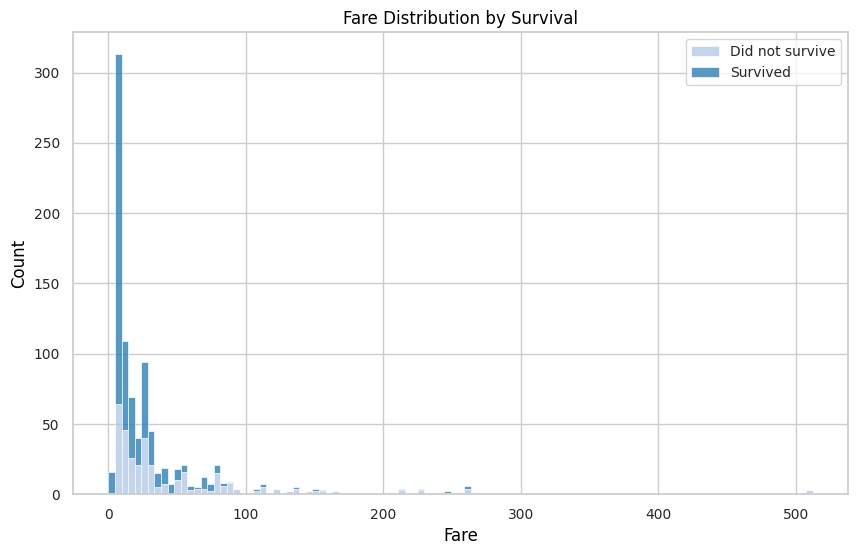

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font style
font = {'family': 'sans-serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.rcParams['font.family'] = 'sans-serif'

# Set dark blue color palette
custom_palette = sns.color_palette(['#1f77b4', '#aec7e8'])  # Dark blue tones

# Set style and color palette
sns.set(style='whitegrid', palette=custom_palette)

# Plot age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette=custom_palette)
plt.title('Age Distribution by Survival', fontdict=font)
plt.xlabel('Age', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels=['Did not survive', 'Survived'], fontsize=10)
plt.show()

# Plot survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex', fontdict=font)
plt.xlabel('Sex', fontdict=font)
plt.ylabel('Survival Rate', fontdict=font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Plot survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass', fontdict=font)
plt.xlabel('Pclass', fontdict=font)
plt.ylabel('Survival Rate', fontdict=font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Plot fare distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', palette=custom_palette)
plt.title('Fare Distribution by Survival', fontdict=font)
plt.xlabel('Fare', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels=['Did not survive', 'Survived'], fontsize=10)
plt.show()


**4. Explore Relationships Between Variables**


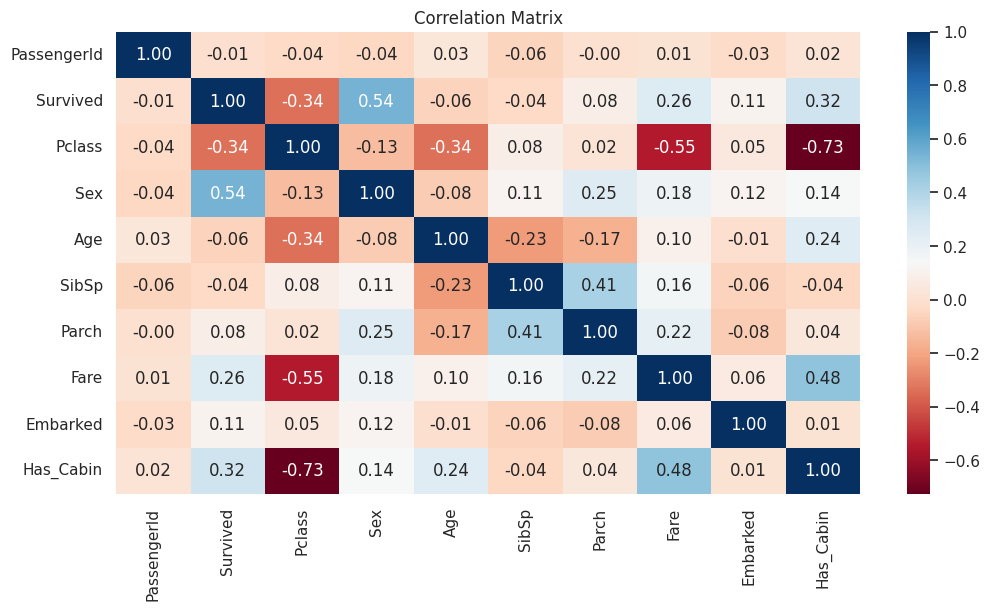

In [ ]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()